In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import umap
import trimap
import pacmap
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import LocallyLinearEmbedding

/Users/carl/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

penguins = penguins.dropna()
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)


In [3]:
species_list = penguins.species_short.unique().tolist()
species = penguins.species_short.map(lambda x: species_list.index(x))
# species

In [46]:
def algoSpecEmb(dataset, ndim=2):

    embedding = SpectralEmbedding(n_components = ndim, n_neighbors=100).fit_transform(dataset)
                                  
    return embedding
                     
                                

In [26]:
def algoTSNE(dataset, ndim = 2):
    # 
    from sklearn.manifold import TSNE
  
    embedding = TSNE(n_components=ndim, learning_rate='auto',
                 init='random').fit_transform(dataset)
    return embedding

In [27]:
def algoPCA(dataset, ndim=2):
    from sklearn.decomposition import PCA
    embedding = PCA(n_components=ndim).fit_transform(dataset)
    return embedding

In [28]:
def algoUMAP(dataset,ndim=2):

    embedding = umap.UMAP(n_components=ndim).fit_transform(dataset)
    
    return embedding

In [29]:
def algoTRIMAP(dataset, distance, ndim=2):
    
    embedding = trimap.TRIMAP(n_dims=ndim, distance=distance).fit_transform(dataset)
    
    return embedding


In [30]:
def algoLocLinEmb(dataset, ndim=2):
    params = {
        "n_neighbors": 12,
        "n_components": ndim,
        "eigen_solver": "auto",
        "random_state": nr.RandomState(0),
    }

    embedding = LocallyLinearEmbedding(method="standard", **params).fit_transform(dataset)
    
    return embedding


In [31]:
def plotscatter(reduced, classtargets):
    plt.scatter(reduced[:,0], reduced[:,1], c=classtargets, cmap='turbo', s=5)
    
def plotdigit(sample):
    sns.heatmap(sample.reshape(8,8), annot=True)

In [32]:
def algoPaCMAP(dataset, ndim=2):
    pmap = pacmap.PaCMAP(n_components=ndim+1, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 

    # fit the data (The index of transformed data corresponds to the index of the original data)
    embedding = pmap.fit_transform(dataset, init="pca")
    
    return embedding[:,1:]


In [33]:
def algoIsomap(dataset, ndim=2):

    from sklearn.manifold import Isomap

    embedding = Isomap(n_components=2).fit_transform(dataset)
    
    return embedding

In [34]:
import numpy.random as nr
nr.RandomState(0)

RandomState(MT19937) at 0x1697F1040

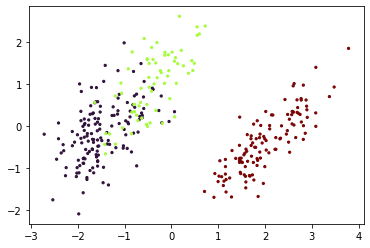

In [35]:
reduced = algoPCA(scaled_penguin_data)
plotscatter(reduced, species)
# reduced

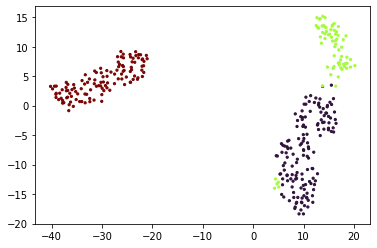

In [36]:
reduced = algoTSNE(scaled_penguin_data)
plotscatter(reduced, species)

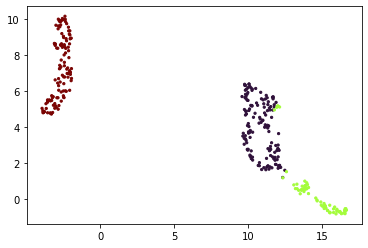

In [37]:
reduced = algoUMAP(scaled_penguin_data)
plotscatter(reduced, species)

In [1]:
reduced = algoTRIMAP(scaled_penguin_data)
plotscatter(reduced, species)

NameError: name 'algoTRIMAP' is not defined

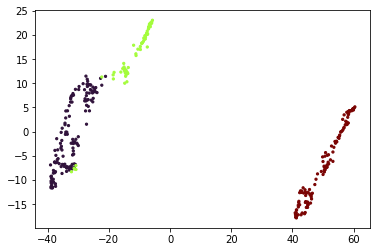

In [39]:
reduced = algoTRIMAP(scaled_penguin_data, distance="euclidean")
plotscatter(reduced, species)

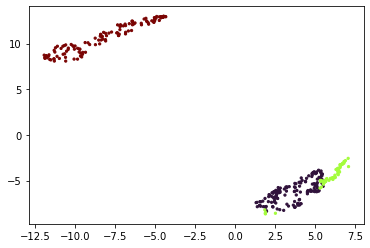

In [50]:
reduced_PaCMAP = algoPaCMAP(scaled_penguin_data)
plotscatter(reduced_PaCMAP, species)

In [3]:
reduced_Iso = algoIsomap(scaled_penguin_data)
plotscatter(reduced_Iso, species)

NameError: name 'algoIsomap' is not defined

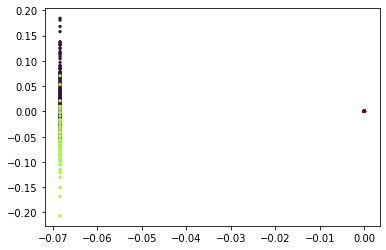

In [42]:
reduced = algoLocLinEmb(scaled_penguin_data)
plotscatter(reduced, species)

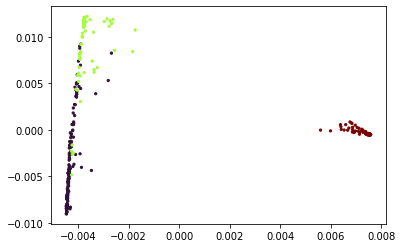

In [48]:
reduced_spectral = algoSpecEmb(scaled_penguin_data)
plotscatter(reduced_spectral, species)

In [23]:
##done algorithms
# pacmap
# trimap
# tsne
# pca
# quality diversity 
# umap
##Locally Linear Embeddings
## Spectural Embedding